In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (8, 5)

import warnings
warnings.filterwarnings('ignore')

# Boostings

Данные с которыми вы будете работать представляют из себя характеристики клиента страховой компании по которым нужно понять будет ли он заинтересован в страховке. Таким образом, страховая компания может более оптимально таргетить рекламу и выстраивать коммуникацию с клиентами, повышая конверсию.

**Описания колонок:**
- Gender - Male, Female
- Age - Возраст
- Driving_License - Наличие водительского удостоверения
- Region_Code - Область проживания
- Previously_Insured - Пользовался ли раньше услугами страховой компании
- Vehicle_Age - Возраст транспортного средства
- Vehicle_Damage - Попадало ли траспортное средство в ДТП
- Annual_Premium - Ежегодные выплаты клиента
- Policy_Sales_Channel - Политика распространения страховых услуг (через посредников, напрямую и т.д.)
- Vintage - Количество дней, в течение которых клиент был связан с компанией 


- **Response** - заинтересован в страховке 1, не откликнулся 0

In [181]:
data = pd.read_csv('/Users/alikhansainov/Desktop/Karpov/vehicle_insurance.csv')

data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,Female,24,1,37.0,1,< 1 Year,No,21243.0,152.0,21,0
9996,Male,28,1,35.0,1,< 1 Year,No,23589.0,160.0,173,0
9997,Female,27,1,15.0,0,< 1 Year,Yes,33340.0,152.0,207,0
9998,Female,28,1,14.0,1,< 1 Year,No,25426.0,152.0,247,0


In [182]:
cat_columns = [col for col in data.columns if data[col].dtype =='object']

**Задание 0.** Проведите небольшой EDA. Посмотрите на распределения некоторых колонок, на матрицу корреляций. Также проверьте баланс классов и посмотрите на распределение возраста транспортного средства в зависимости от response. \
Закодируйте признаки типа `object` с помощью `one-hot` кодирования.

P.S. некоторые не `object`колонки по смыслу очевидно являются категориальными. Так как мы будем строить ансамбли на основе деревьев, их можно оставить в первоначальном виде.

In [183]:
# data.info()

for col in cat_columns:
    ohe = pd.get_dummies(data[col], drop_first=True, dtype=float)
    data = pd.concat((data.drop(col, axis=1), ohe),axis=1)



In [184]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,38.812900,0.997800,26.425400,0.443800,30609.649700,112.414400,155.560300,0.124700,0.543700,0.433000,0.040700,0.51430
std,15.514785,0.046855,13.153552,0.496856,16562.392967,53.975042,83.923849,0.330395,0.498112,0.495515,0.197604,0.49982
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,25.000000,1.000000,15.000000,0.000000,24458.250000,30.000000,83.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,36.000000,1.000000,28.000000,0.000000,31746.000000,136.000000,156.000000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,49.000000,1.000000,35.000000,1.000000,39572.250000,152.000000,228.000000,0.000000,1.000000,1.000000,0.000000,1.00000
max,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [185]:
data.isnull().sum()

Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
Male                    0
< 1 Year                0
> 2 Years               0
Yes                     0
dtype: int64

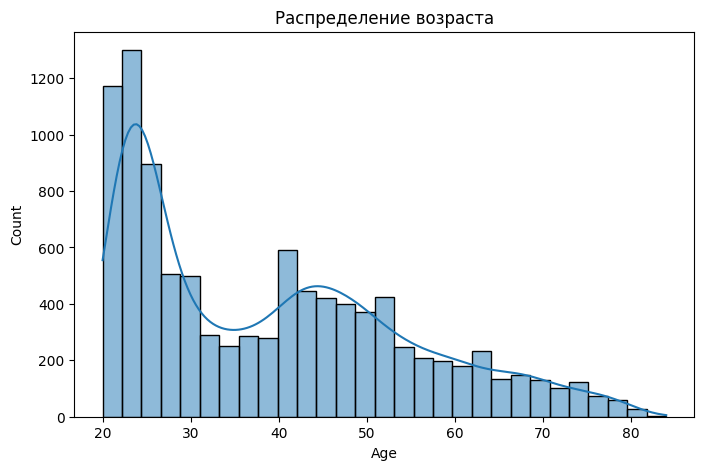

In [186]:
sns.histplot(data['Age'], kde=True)
plt.title('Распределение возраста')
plt.show()

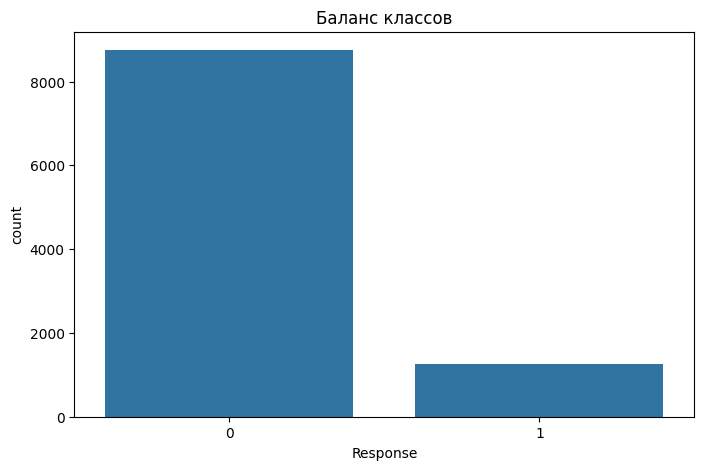

In [187]:

sns.countplot(x=data['Response'], data=data)
plt.title('Баланс классов')
plt.show()

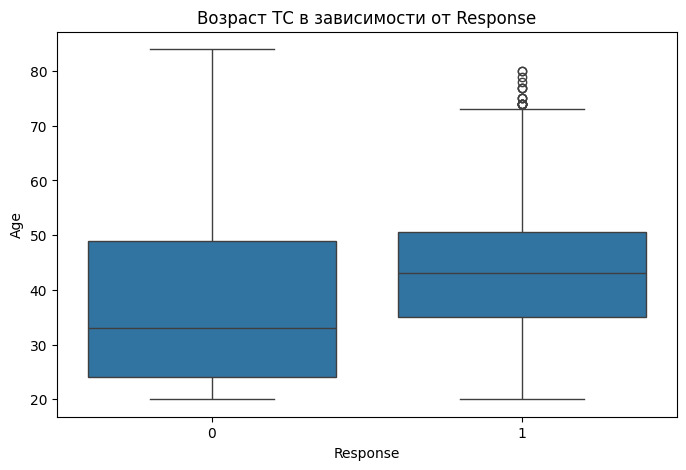

In [188]:
sns.boxplot(x=data['Response'], y=data['Age'], data=data)
plt.title('Возраст ТС в зависимости от Response')
plt.show()

**Задание 1.** Обучите градиентный бустинг из sklearn на данных и замерьте accuracy и f1-score на тестовой выборке. В качестве параметров ансамбля установите `learning_rate = 1`, `random_state = 1`, `n_estimators = 100`. Изобразите ROC-кривую и посчитайте AUC, оцените качество классификации. (2б)

P.S. для всех прочих моделей в этом домашнем задании тоже фиксируйте `random_state = 1`. Как думаете, что может быть случайного в процедуре обучения градиентного бустинга?

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, roc_curve, auc

X = data.drop('Response', axis=1)
y = data['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0,
                                                    shuffle=True,
                                                    test_size=0.2)

In [190]:
from sklearn.ensemble import GradientBoostingClassifier

### Your code is here

GBC = GradientBoostingClassifier(learning_rate=1, random_state=1, n_estimators=100)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_test)
y_pred_proba = GBC.predict_proba(X_test)[:,1]
classification = classification_report(y_test, y_pred, digits=2)
f1_score_GBC = f1_score(y_test, y_pred)
print(classification)
print(f1_score_GBC)



              precision    recall  f1-score   support

           0       0.90      0.93      0.92      1770
           1       0.31      0.24      0.27       230

    accuracy                           0.85      2000
   macro avg       0.61      0.59      0.59      2000
weighted avg       0.84      0.85      0.84      2000

0.2702702702702703


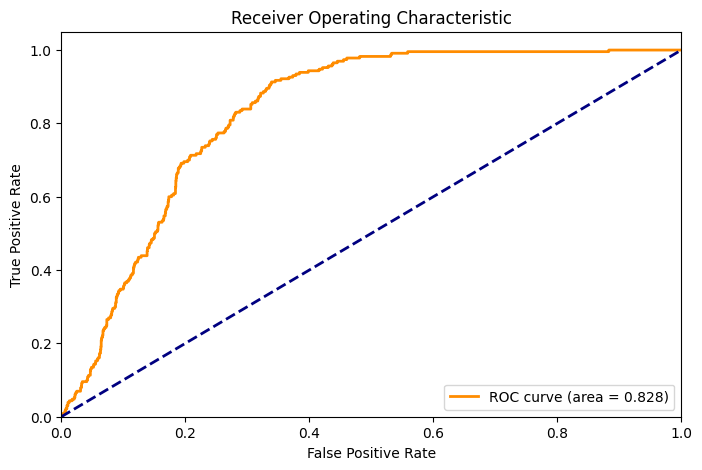

AUC: 0.828


In [191]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Визуализация ROC-кривой
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc:.3f}")

**Задание 2.** Переберите параметры `n_estimators` и `learning_rate` по двумерной сетке. При обучении в цикле сразу считайте f1-score на тестовой выборке и сохраняйте результат в матрицу. Для какого алгоритма качество окажется максимальным?

Постройте кривые для метрики f1-score в зависимости от числа шагов для нескольких learning_rate. Изобразите heatmap полученной матрицы. Сделайте вывод, как количество шагов влияет на качество совместно с различной скоростью обучения? (2б)

P.S. для подсчета f1-score передайте в функцию параметр `average='weighted'`, чтобы учитывался еще и баланс классов (вспомните микро/макро-усреднения).

In [192]:
### Задаем сетку параметров

n_estimators_list = [5, 10, 20, 50, 100, 200, 700, 1000]
learning_rate_list = [1, 0.1, 0.01]

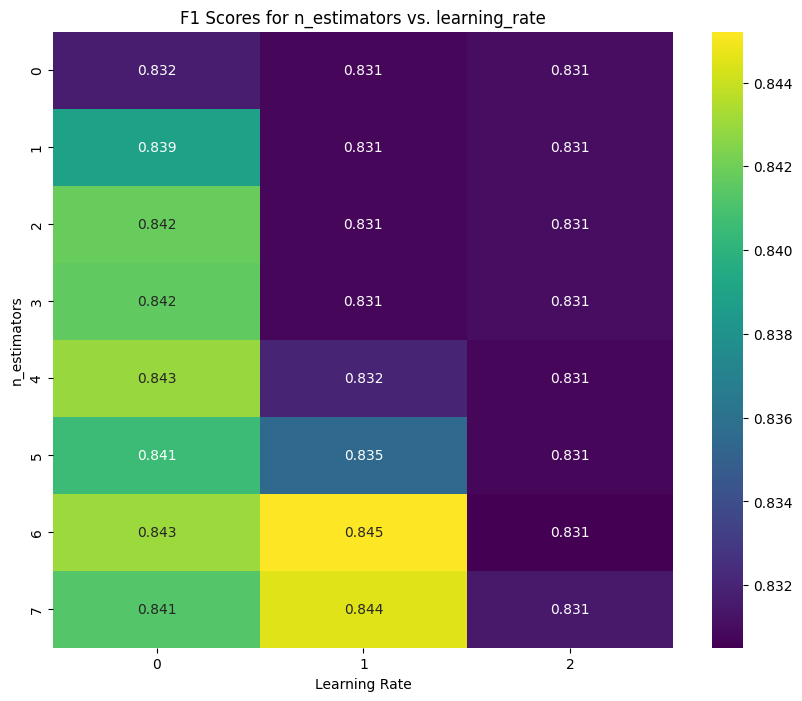

Maximum F1 Score: 0.845


In [196]:
### Your code is here
matrix_result = np.zeros((len(n_estimators_list),len(learning_rate_list)))
for i, n_estimator in enumerate(n_estimators_list):
    for j, learning_rate in enumerate(learning_rate_list):
        GBC = GradientBoostingClassifier(n_estimators=n_estimator, learning_rate=learning_rate, random_state=1)
        GBC.fit(X_train, y_train)
        y_pred = GBC.predict(X_test)
        f1_score_GBC = f1_score(y_test, y_pred, average='weighted')
        matrix_result[i,j] = f1_score_GBC
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_result, annot=True, fmt=".3f", cmap='viridis')
plt.title('F1 Scores for n_estimators vs. learning_rate')
plt.xlabel('Learning Rate')
plt.ylabel('n_estimators')
plt.show()
max_f1_score = np.max(matrix_result)
print(f"Maximum F1 Score: {max_f1_score:.3f}")


**Задание 3.** Вам потребуется обучить 4 модели и посчитать метрику f1-score на тестовой и обучающей выборках для каждой модели. 
1. Случайный лес с максимальной глубиной деревьев 5,
2. Случайный лес с максимальной глубиной деревьев 5000,
3. Градиентный бустинг с максимальной глубиной деревьев 5,
4. Градиентный бустинг с максимальной глубиной деревьев 5000.

Для каждой модели перебирайте значения `n_estimators`, как в предыдущем задании. Отрисуйте графики зависимости f1-score от количества шагов, используя `average='weighted'` для учёта баланса классов. 

Если в качестве базовой модели брать неглубокие деревья, то какая модель лучше запоминает обучающую выборку: случайный лес или градиентный бустинг? Какая из них лучше предсказывает на тестовой выборке? Как изменятся ответы, если базовая модель - это глубокое решающее дерево?

Подвержен ли переобучению случайный лес и градиентный бустинг? Как это отражается на графиках? (4б)

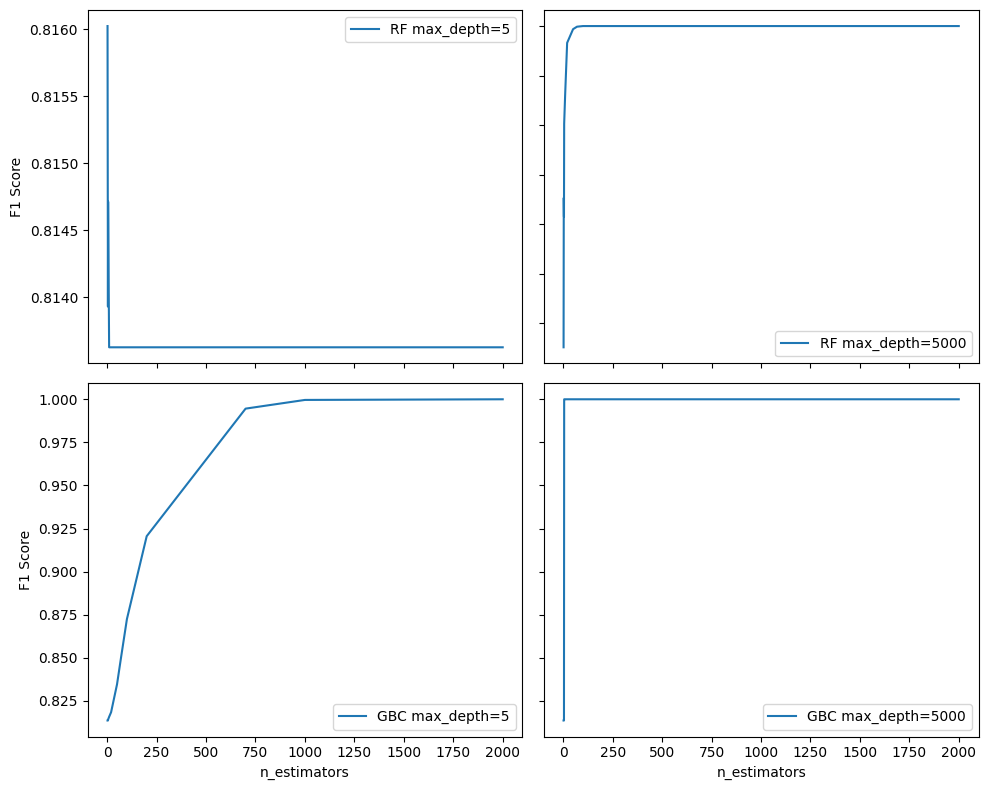

Maximum F1 Score: 1.000


In [209]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [2, 3, 4, 5, 10, 20, 50, 70, 100, 200, 700, 1000, 2000]

### Your code is here
matrix_result_clf=[]
matrix_result_clf2=[]
matrix_result_GBC=[]
matrix_result_GBC2=[]
for i, n_estimator in enumerate(n_estimators_list):
    clf = RandomForestClassifier(max_depth=5, n_estimators=n_estimator, random_state=1)
    clf2 = RandomForestClassifier(max_depth=5000, n_estimators=n_estimator, random_state=1)
    GBC = GradientBoostingClassifier(max_depth=5, n_estimators=n_estimator, random_state=1)
    GBC2 = GradientBoostingClassifier(max_depth=5000, n_estimators=n_estimator, random_state=1)

    clf.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    GBC.fit(X_train, y_train)
    GBC2.fit(X_train, y_train)

    y_pred_clf = clf.predict(X_train)
    y_pred_clf2 = clf2.predict(X_train)
    y_pred_GBC = GBC.predict(X_train)
    y_pred_GBC2 = GBC2.predict(X_train)

    f1_score_clf = f1_score(y_train, y_pred_clf, average='weighted')
    f1_score_clf2 = f1_score(y_train, y_pred_clf2, average='weighted')
    f1_score_GBC = f1_score(y_train, y_pred_GBC, average='weighted')
    f1_score_GBC2 = f1_score(y_train, y_pred_GBC2, average='weighted')

    matrix_result_clf.append(f1_score_clf)
    matrix_result_clf2.append(f1_score_clf2)
    matrix_result_GBC.append(f1_score_GBC)
    matrix_result_GBC2.append(f1_score_GBC2)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].plot(n_estimators_list, matrix_result_clf, label='RF max_depth=5')
axes[0, 1].plot(n_estimators_list, matrix_result_clf2, label='RF max_depth=5000')
axes[1, 0].plot(n_estimators_list, matrix_result_GBC, label='GBC max_depth=5')
axes[1, 1].plot(n_estimators_list, matrix_result_GBC2, label='GBC max_depth=5000')


for ax in axes.flat:
    ax.set(xlabel='n_estimators', ylabel='F1 Score')
    ax.label_outer()
    ax.legend()

plt.tight_layout()
plt.show()


# Calculate the maximum F1 score across all models and configurations
max_f1_score = max(max(matrix_result_clf), max(matrix_result_clf2), max(matrix_result_GBC), max(matrix_result_GBC2))


print(f"Maximum F1 Score: {max_f1_score:.3f}")

**Задание 4.** Установите библиотеку `catboost`. Главной особенностью catboost явялется наличие встроенной обработки категориальных признаков. Для каждого категориального столбца вычисляется следующее значение
$$
avg\_target = \dfrac{countInClass + prior}{totalCount + 1},
$$
* countInClass - количество объектов положительного класса для данной категории **до текущего объекта**,
* prior - некоторая константа для числителя, обычно равна доле положительного класса в таргете,
* totalCount - количество наблюдаемых категорий вплоть **до текущего** с той же категорией, что и у текущего.

Так как первые такие значения будут иметь больший разброс, чем последние, то выборку перемешивают несколько раз и полученные статистики усредняют. 
В отличие от target encoder подсчитанные значения зависят от наблюдаемой истории, т.е. вычисляются только из наблюдений до них, таким образом не происходит target leakage. 

Почитать подробнее можно здесь: [Transforming categorical features](https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic)

Обучите CatBoostClassifier с дефолтными параметрами. Используйте датасет до  (разбейте на train/test по старой логике с тем же random state'ом). Категориальные колонки передайте в параметр `cat_features` метода `fit`. Catboost сам с ними разберется.

Сравните качество с моделью из предыдущего задания. Стало ли лучше?

Сравните feature importances в модели из задания 2 и в catboost с помощью соответствующих методов, изобразите их, используя `barplot`. \
Какие признаки стали более важными с новым методом кодирования? (4б)

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Male,< 1 Year,> 2 Years,Yes
7389,60,1,4.0,0,30498.0,124.0,228,1.0,0.0,0.0,1.0
9275,23,1,8.0,1,45193.0,152.0,186,0.0,1.0,0.0,0.0
2995,74,1,46.0,0,2630.0,11.0,231,1.0,0.0,1.0,1.0
5316,51,1,28.0,0,35828.0,26.0,80,0.0,0.0,0.0,1.0
356,22,1,46.0,1,28311.0,152.0,240,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
9225,24,1,30.0,1,45167.0,152.0,57,0.0,1.0,0.0,0.0
4859,46,1,28.0,1,27433.0,124.0,274,0.0,0.0,0.0,0.0
3264,40,1,28.0,0,44575.0,26.0,88,0.0,0.0,1.0,1.0
9845,51,1,16.0,0,24198.0,152.0,81,1.0,0.0,0.0,0.0


F1 score0.835


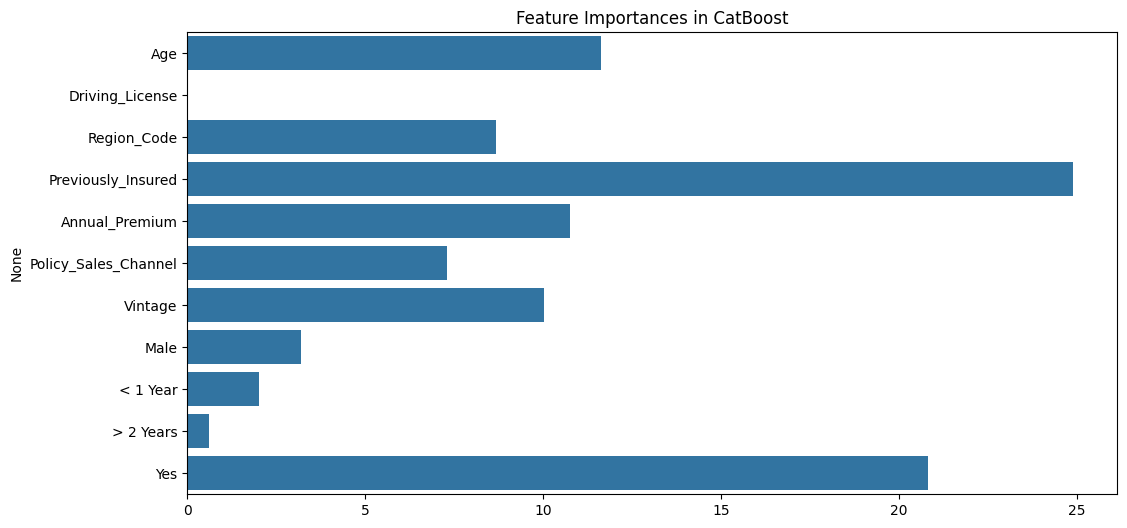

In [224]:
from catboost import CatBoostClassifier

### Your code is here
cat_features = [col for col in X.columns if X[col].dtype == 'object']

model = CatBoostClassifier(random_state=1, verbose=0)
model.fit(X_train, y_train, cat_features=cat_features)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print (f'F1 score{f1:.3f}')
feature_importance= model.get_feature_importance()
feature_names= X.columns
plt.figure(figsize=(12, 6)) 
sns.barplot(x=feature_importance, y=feature_names)

plt.title('Feature Importances in CatBoost')
plt.show()

**Задание 5.** Установите библиотеку `lightgbm`. На сегодняшний день это наиболее быстрый метод градиентного бустинга, при этом расходующий небольшое количество оперативной памяти. Достигает он этого за счет построения деревьев вглубь по листьям (leaf-wise), а не по уровням (level-wise), как другие методы, например XGBoost. 
Более понятно это на картинке:

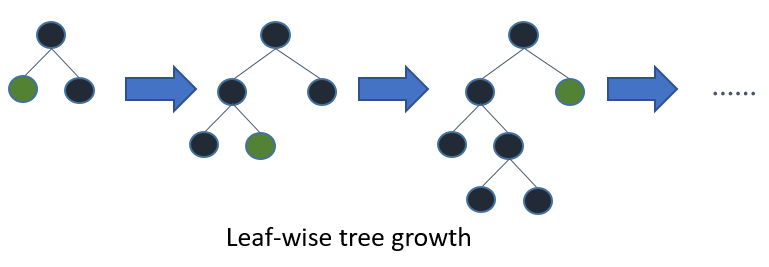

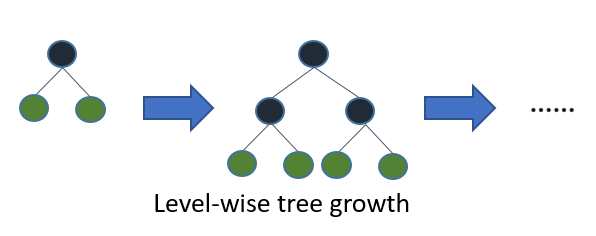

В то время, как XGBoost за раз разделяет вершины на целом уровне той же глубины, LightGBM разделяет одну вершину за раз. Отсюда прирост в скорости.

Обучите `LGBMClassifier` на изначальных(закодированных) данных и добейтесь максимального качества на тестовой выборке, перебрав параметры глубины деревьев, количества шагов, скорости обучения и т.д.

In [230]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [100, 500, 1000, 2000],
          'max_depth': [2, 3, 5, 100],
          'learning_rate': [0.1, 0.01, 0.001]}

### Your code is here

grid_search = LGBMClassifier()


ModuleNotFoundError: No module named 'lightgbm'